# CCT College Dublin

## Assessment Cover Page

**Module Title**: Problem Solving for Industry  
**Assessment Title**: Capstone Project

**Lecturer Name**: Dr. Muhammad Iqbal  
**Student Full Name**: Ingrid Menezes Castro and Robert Szlufik  
**Student Number**: 2020341 / 2020358  
**Assessment Due Date**: 17/05/2024  
**Date of Submission**: 17/05/2024 

**GITHUB LINK**: https://github.com/IC2020341/Capstone_Project

---------------

## Declaration

<div style="border: 1px solid black; padding: 10px;">
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
</div>

-------------

# Imports

In [1]:
# install this library if not present 
# !pip install wordcloud


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot 
import seaborn as sns
from wordcloud import WordCloud

# Importing necessary modules for model evaluation and preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Importing GridSearchCV for hyperparameter tuning and mean_squared_error for model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# package that will help us to save tough models, this will allow us to run all notebook quickly 
import pickle as pk
import pickle
from math import sqrt
import json
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# GUI
import tkinter as tk
from tkinter import ttk

# Read CSVs

Datasets are available on the link in readME. Change the paths as needed.

In [3]:
path_movies ='../Datasets/movies.csv'
path_ratings = '../Datasets/ratings.csv' 

movies = pd.read_csv(path_movies)
ratings = pd.read_csv(path_ratings)

# Data Understanding and Preparation

In this phase, we will do the basic first exploration of what the data comprises. As this is an interactive project, some data preparation is also done along with data understanding. But as a way to organise this second and third phase we organised this way:

- Data Understanding and Prep of the Movies dataset, with further data understanding about genres and data visualisations of genres and year.
- Data Understanding and Prep of the Ratings dataset.
- Merging of both datasets.
- Data preparation for Modelling.

## Data Understanding for Movies Dataset

- ‘Movies’ dataset contains 62.423 rows and 3 columns;
- Columns are: ‘movieId’ (int64), ‘title’ (object) and ‘genres’ (object);
- No duplicated values;
- No Null values;
- No NA values;

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [6]:
movies.shape

(62423, 3)

In [7]:
movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [9]:
movies.nunique()

movieId    62423
title      62325
genres      1639
dtype: int64

In [10]:
movies.duplicated().sum()

0

In [11]:
movies['title'].value_counts()

title
The Void (2016)                                2
Seven Years Bad Luck (1921)                    2
Clear History (2013)                           2
Enron: The Smartest Guys in the Room (2005)    2
Deranged (2012)                                2
                                              ..
$ellebrity (Sellebrity) (2012)                 1
Macabre (Macabro) (1980)                       1
Punk's Dead: SLC Punk! 2 (2014)                1
Chinese Hercules (1973)                        1
Women of Devil's Island (1962)                 1
Name: count, Length: 62325, dtype: int64

In [12]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [13]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

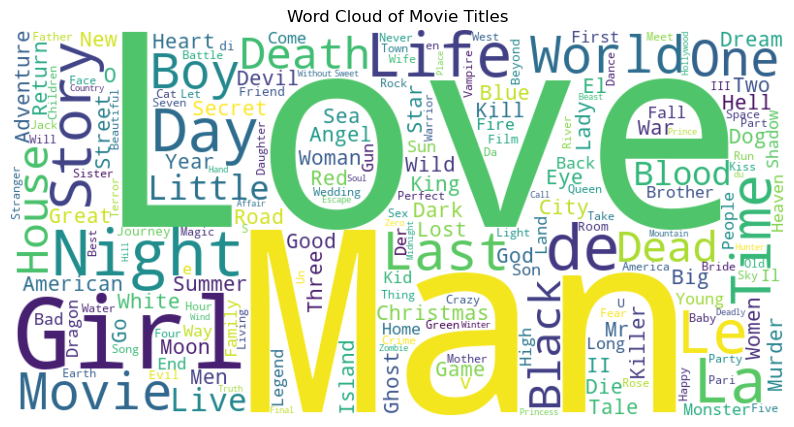

In [14]:
# this data visualisation gives us the main words in movie titles

text = ' '.join(movies['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

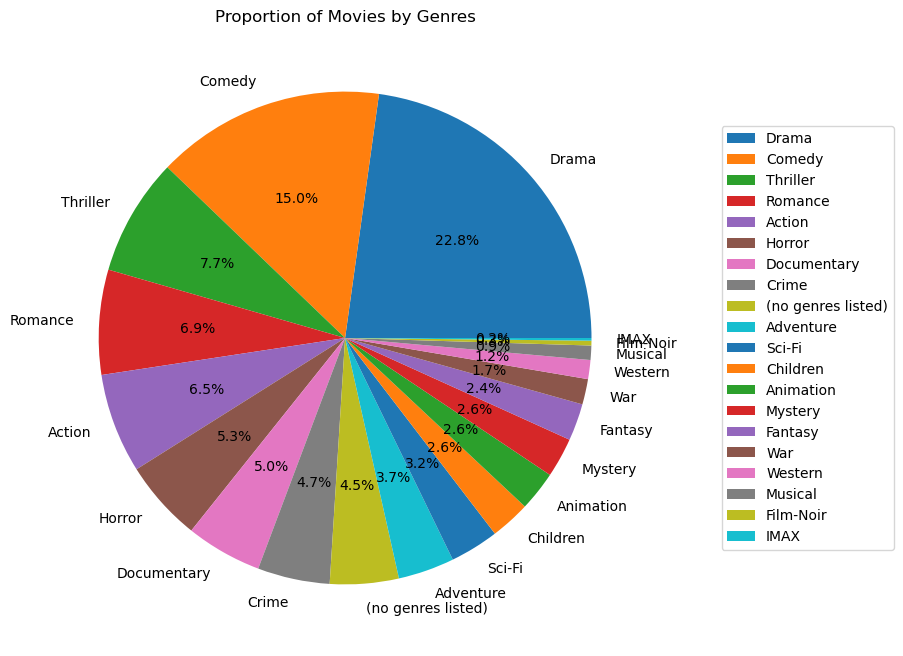

In [15]:
# this visualisation slices genres and give us percentages of each genres
genres_count = movies['genres'].str.split('|', expand=True).stack().value_counts()

plt.figure(figsize=(10, 8))
genres_count.plot(kind='pie', autopct='%1.1f%%')
plt.legend(genres_count.index, loc="center left", bbox_to_anchor=(1.1, 0, 0.5, 1))
plt.title('Proportion of Movies by Genres')
plt.ylabel('')
plt.show()

## Data Preparation for Movies Dataset

### Genre splitting

In this process we will slice the genre column and do dummy encoding in it. This will enable us to work with the genres as if those are numerical values. 

In the code below 3 actions were done:
- Slicing of genres and encoding of it;
- Creation of genre_count column;
- Moving genre_count to the front of the new section.

In [16]:
# Separating genres to count them.
movie_genres = movies['genres'].str.get_dummies('|')
movie_genres.drop(columns=["(no genres listed)"], inplace=True)

# Creating the genre_count column, that calculate how many genres the movie has and gives a numerical value.
movie_genres['genre_count'] = movie_genres.iloc[:, 0:19].astype(bool).sum(axis=1)

# Moving the column to the front.
genre_count_column = movie_genres.pop('genre_count')
movie_genres.insert(0, 'genre_count', genre_count_column)
movie_genres.head()

,genre_count,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,3,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Below we just are going to merge these new columns to the main dataset:

In [17]:
# merge with original dataset.
movies_encoded = pd.concat([movies, movie_genres], axis=1)
movies_encoded.head()

,movieId,title,genres,genre_count,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,2,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
movies_encoded.dtypes

movieId         int64
title          object
genres         object
genre_count     int64
Action          int64
Adventure       int64
Animation       int64
Children        int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
IMAX            int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
dtype: object

### Year Column addition

Another numerical value we can insert in this dataset is the year, because all movie names contain their year in parenthesis. In this code below we:

- Extracted year values;
- Filled NA values with 0 (in case some movies don't have the Year value in the correct format/ don't have the year value);
- Moved the column to the third position.

In [19]:
# Extraction of the year, and na filling
movies_encoded['year'] = movies_encoded['title'].str.extract(r'\((\d{4})\)')
movies_encoded['year'] = movies_encoded['year'].fillna(0).astype('int64')

# moving column around to the front
year_column = movies_encoded.pop('year')
movies_encoded.insert(2, 'year', year_column)

movies_encoded.head()

,movieId,title,year,genres,genre_count,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995,Adventure|Animation|Children|Comedy|Fantasy,5,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995,Adventure|Children|Fantasy,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995,Comedy|Romance,2,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995,Comedy|Drama|Romance,3,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),1995,Comedy,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Data Understanding for Movies Dataset: Genres and Year

After the process of slicing year off of movie names and encoding  we can do some data understanding about genres. The ones we chose to do were:
- Which movie has the most genres: Rubber.
- How many genres the movie with most genres has: 10 genres.
- What is the average number of genres movies have: 1.72.
- The average year of movies in the catalogue: 1978.
- The top ten years with most movies entries.

In [20]:
print("The movie with the most number of genres contains:", movies_encoded.genre_count.max(), "genres")
print("The movie moth most genres is:")
movies_max = movies_encoded[movies_encoded['genre_count'] == 10]
movies_max

The movie with the most number of genres contains: 10 genres
The movie moth most genres is:


,movieId,title,year,genres,genre_count,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
15389,81132,Rubber (2010),2010,Action|Adventure|Comedy|Crime|Drama|Film-Noir|...,10,1,1,0,0,1,...,1,1,0,0,1,0,0,1,0,1


In [21]:
average_genre_count = round(movies_encoded['genre_count'].mean(), 2)
average_year = int(movies_encoded['year'].mean())
year_counts = movies_encoded['year'].value_counts().reset_index().head(10)

print("The average number of genres for each movie is: {:.2f}\nThe average year is: {}\nAnd these are the top 10 years for movies in our system:".format(average_genre_count, average_year))
year_counts

The average number of genres for each movie is: 1.72
The average year is: 1978
And these are the top 10 years for movies in our system:


,year,count
0,2015,2513
1,2016,2488
2,2014,2406
3,2017,2374
4,2013,2173
5,2018,2034
6,2012,1978
7,2011,1838
8,2009,1724
9,2010,1691


### Data visualisations for Movies Dataset

We did two visualisations:
- Genre: A bar plot with genres and their value_counts.
- Year: A line plot with years and the counts of them.

#### Genre

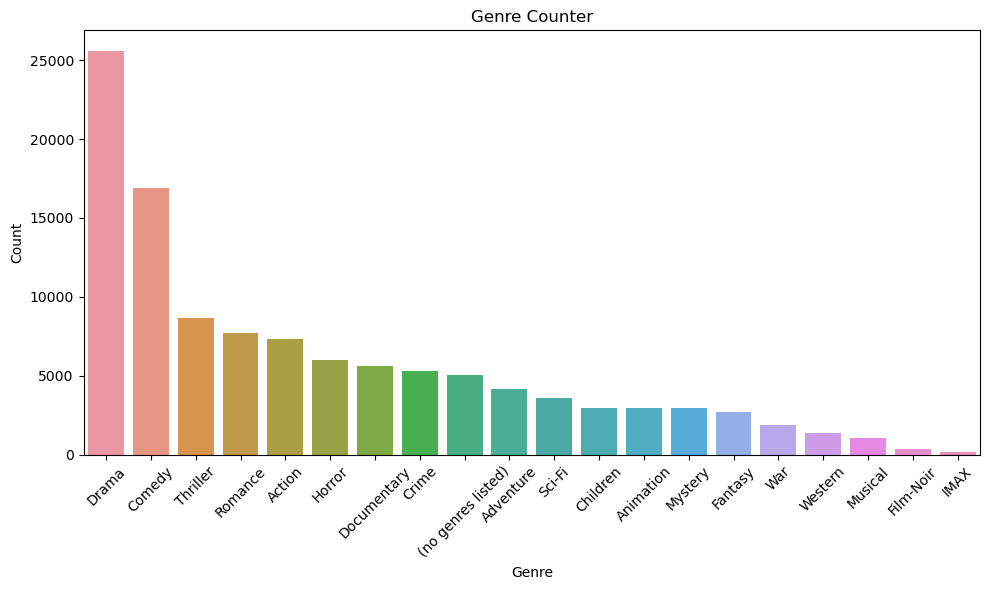

In [22]:
genres_count = movies_encoded['genres'].str.split('|', expand=True).stack().value_counts().reset_index()
genres_count.columns = ['genres', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='genres', y='count', data=genres_count)
plt.title('Genre Counter')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Year

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


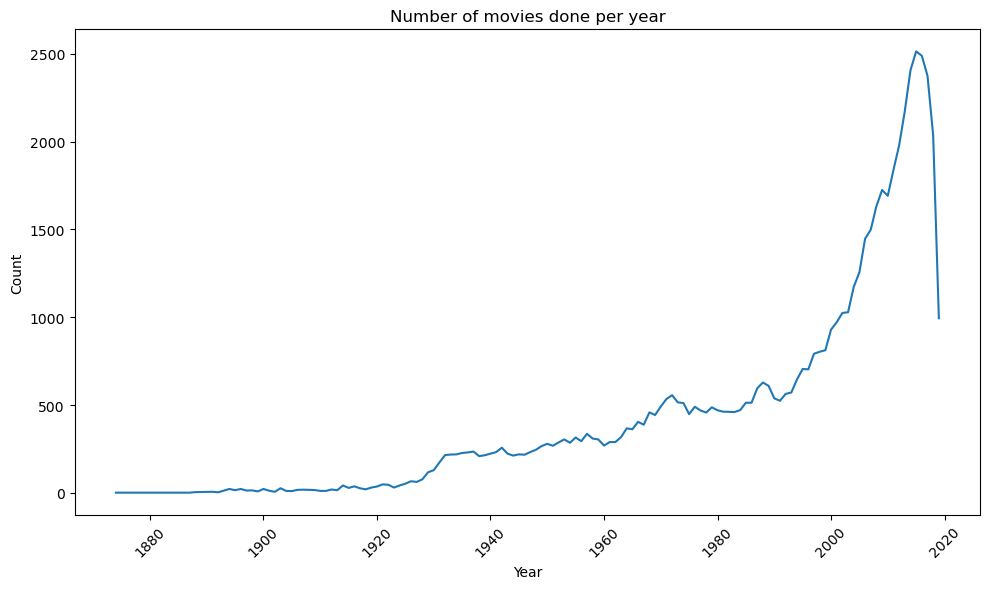

In [23]:
year_counts = movies_encoded['year'].replace(0, np.NaN)
year_counts = year_counts.dropna()
year_counts = year_counts.value_counts().reset_index()
year_counts

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='count', data=year_counts)
plt.title('Number of movies done per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

------------------

## Data Understanding for Ratings Dataset

In this dataset we did the following data understanding:
- 'Ratings' dataset contains 25.000.095 rows and 4 columns;
- Columns are: 'userId' (int64), 'movieId' (int64), 'rating' (float64), 'timestanmp' (int64);
- No duplicate values;
- No null values;
- No NA values;

In [24]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [25]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [26]:
ratings.shape

(25000095, 4)

In [27]:
ratings.duplicated().sum()

0

In [28]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [29]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [30]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

array([[<Axes: title={'center': 'userId'}>,
        <Axes: title={'center': 'movieId'}>],
       [<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'timestamp'}>]], dtype=object)

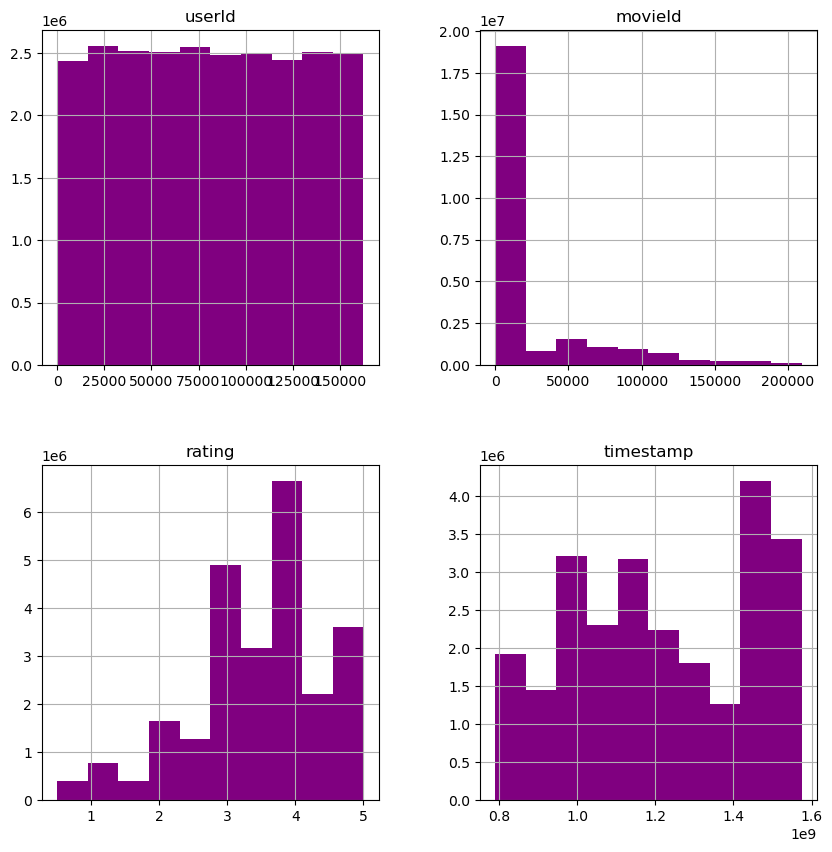

In [31]:
ratings.hist(figsize = (10,10), color="#800080")

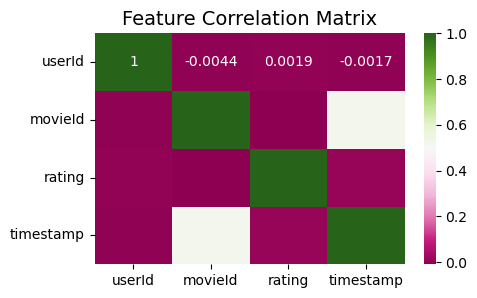

In [32]:
plt.figure(figsize=(5,3))
sns.heatmap(ratings.corr(), annot=True, cmap='PiYG')
plt.title("Feature Correlation Matrix",fontsize=14)
plt.show()

# Data preparation for Ratings

Since there are no missing values or duplicates, we can go on excluding the 'timestamp' column (it is not necessary for what we need).

In [33]:
ratings.drop(columns="timestamp",inplace = True)

# Merging datasets and dropping genres column

To move forward we will use one dataset only, so we need to merge Movies_Encoded and Ratings. We will name this Merged, as in a merged dataframe and exclude the genres column.

In [34]:
# Merging movies_encoded and ratings dataframes 
merged = ratings.merge(movies_encoded,on="movieId")

# Dropping genres because we will not need it further
merged.drop(columns="genres",inplace = True)

# display dataset
merged.head()

,userId,movieId,rating,title,year,genre_count,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,296,5.0,Pulp Fiction (1994),1994,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,296,5.0,Pulp Fiction (1994),1994,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,296,4.0,Pulp Fiction (1994),1994,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,5,296,4.0,Pulp Fiction (1994),1994,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,7,296,4.0,Pulp Fiction (1994),1994,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
merged.shape

(25000095, 25)

In [36]:
merged.isnull().sum()

userId         0
movieId        0
rating         0
title          0
year           0
genre_count    0
Action         0
Adventure      0
Animation      0
Children       0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
IMAX           0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [37]:
merged.isna().sum()

userId         0
movieId        0
rating         0
title          0
year           0
genre_count    0
Action         0
Adventure      0
Animation      0
Children       0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
IMAX           0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [38]:
merged.duplicated().sum()

0

# Data preparation for Modelling

For the data preparation for modelling we need to do some actions to make data proper for model usage. We did this data prep:

- Sampled the data: we took a sample of 100 thousand rows from the merged dataset.
- Encoded rating values: because the values were float, we encoded the numbers to be integers, not going from 0.5-5, but instead, 1-10.
- Selected columns for independent variable X: columns "rating" and "title" were removed.
- Declared X and Y: We declared the dependent (y) and independent variables (X).
- Split the data: we split the data into testing and training, with test sizing being 30%.
- Scaled data: we scaled the train and test data with the StandardScaler().

In [39]:
# take sample of 100k records from merged dataset
merged_sample = merged.sample(100000)

In [40]:
# rating is a float number, to pass it to model, we need integer value
encoder = {
          0.5: 1,
          1 : 2,
          1.5: 3,
          2:4,
          2.5 : 5,
          3:6,
          3.5:7,
          4:8,
          4.5:9,
          5:10
           }
merged_sample["rating"] = merged_sample["rating"].map(encoder)

# Modeling 

In [41]:
# select predictor columns
columns_X = merged_sample.columns.to_list()
columns_X.remove("rating")
columns_X.remove("title")
columns_X  

['userId',
 'movieId',
 'year',
 'genre_count',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [42]:
# declare X and y values 
X = merged_sample[columns_X]
y = merged_sample["rating"]

In [43]:
# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.3,  
                                   shuffle=True) 

In [44]:
# scale training ans testing set 
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test) 

# Models Cross Validation

Here we will perform Stratified K-Fold Cross Validation to see which model performs the best. This allows us to measure and compare how accurate each model is and make it onto a graph to show the compared performance.

In [45]:
# select few algorithms for comparison 
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DT', DecisionTreeRegressor()))
models.append(("RF", RandomForestClassifier()))
models.append(('NB', GaussianNB()))

In [46]:
results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=5, random_state=104, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, (cv_results.mean() * -1), cv_results.std())) 

LDA: 2.265927 (0.004009)
DT: 2.799213 (0.015420)
RF: 2.703455 (0.013694)
NB: 2.301387 (0.010929)


## Comparison Box Plot

Below we have the performance comparison for all models:

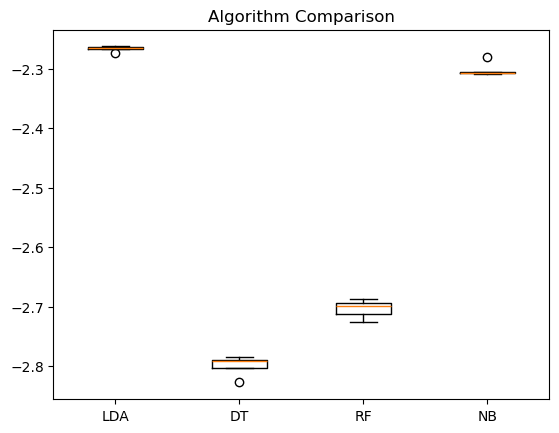

In [47]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show() 

In [48]:
# free up memory 
models = None

### Model Optimization

To optimise, we can use Grid Search, that is a technique to tune hyperparameters of a ML model.

In [49]:
# We can see that LDA performed the best, we can now try to optimise it with grid search
parameters = {
    'n_components': [None, 1, 2, 3],
    'tol': [1e-4, 1e-3, 1e-2],
    'store_covariance': [True, False],
}

# Here we initialize LDA
lda = LinearDiscriminantAnalysis()

# And perform grid search
grid_search = GridSearchCV(lda, parameters, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [None, 1, 2, 3],
                         'store_covariance': [True, False],
                         'tol': [0.0001, 0.001, 0.01]})

At this point, we have chosen and optimised one of models available in sklearn package. In the next part, we will compare it to algorithm obtained from the Suprise package, which was influenced by SVD algorithm.

# SVD Algorithm

SVD, or Singular Value Decomposition, is a dimensionality reduction algorithm, similar to PCA, which aims to obtain a single value from the user item matrix. This algorithm will enable us to calculate user and item biases and calculate general error for each. Then, it adjusts scores and biases, finally merging them together. When making a prediction, estimated score is calculated by adjusting obtained item and user biases.

This is the source code by Nicolas Hug (Hug, 2015a).

In [50]:
class SVD():

    def __init__(self, n_factors=100, n_epochs=20, biased=True, init_mean=0,
                 init_std_dev=.1, lr_all=.005,
                 reg_all=.02, lr_bu=None, lr_bi=None, lr_pu=None, lr_qi=None,
                 reg_bu=None, reg_bi=None, reg_pu=None, reg_qi=None,
                 random_state=None, verbose=False):

        # initilise variables 
        self.n_factors = n_factors
        self.n_epochs = n_epochs
        self.biased = biased
        self.init_mean = init_mean
        self.init_std_dev = init_std_dev
        self.lr_bu = lr_bu if lr_bu is not None else lr_all
        self.lr_bi = lr_bi if lr_bi is not None else lr_all
        self.lr_pu = lr_pu if lr_pu is not None else lr_all
        self.lr_qi = lr_qi if lr_qi is not None else lr_all
        self.reg_bu = reg_bu if reg_bu is not None else reg_all
        self.reg_bi = reg_bi if reg_bi is not None else reg_all
        self.reg_pu = reg_pu if reg_pu is not None else reg_all
        self.reg_qi = reg_qi if reg_qi is not None else reg_all
        self.random_state = random_state
        self.verbose = verbose


    def fit(self, X, y):
      
        # define parameters, datasets, number of users and movies
        data = X.join(y)
        self.n_users = data["userId"].unique().max() + 1
        self.n_items = data["movieId"].unique().max() + 1
        self.global_mean = y.mean()
        self.dataset = data
        self.train_data = data.to_numpy()

        self.sgd(data)

        return self

    def sgd(self, data):
      
        rng =  np.random.RandomState()

        # user biases
        bu = np.zeros(self.n_users, dtype=np.double)
        # item biases
        bi = np.zeros(self.n_items, dtype=np.double)
        # user factors
        pu = rng.normal(self.init_mean, self.init_std_dev, size=(self.n_users, self.n_factors))
        # item factors
        qi = rng.normal(self.init_mean, self.init_std_dev, size=(self.n_items, self.n_factors))


        n_factors = self.n_factors
        biased = self.biased


        global_mean = self.global_mean
        
        # initialise learning rates  
        lr_bu = self.lr_bu
        lr_bi = self.lr_bi
        lr_pu = self.lr_pu
        lr_qi = self.lr_qi

        reg_bu = self.reg_bu
        reg_bi = self.reg_bi
        reg_pu = self.reg_pu
        reg_qi = self.reg_qi

        if not biased:
            global_mean = 0

        for current_epoch in range(self.n_epochs):
            if self.verbose:
                print("Processing epoch {}".format(current_epoch))

            for  u, i, r in self.train_data:
                # compute current error
                u = int(u)
                i = int(i)
                r = int(r)
                dot = 0  # <q_i, p_u>
                # adjust factors 
                for f in range(n_factors):
                    dot += qi[i, f] * pu[u, f]
                err = r - (global_mean + bu[u] + bi[i] + dot)

                # update biases
                if biased:
                    bu[u] += lr_bu * (err - reg_bu * bu[u])
                    bi[i] += lr_bi * (err - reg_bi * bi[i])

                # update factors
                for f in range(n_factors):
                    puf = pu[u, f]
                    qif = qi[i, f]
                    pu[u, f] += lr_pu * (err * qif - reg_pu * puf)
                    qi[i, f] += lr_qi * (err * puf - reg_qi * qif)

        # save results 
        self.bu = np.asarray(bu)
        self.bi = np.asarray(bi)
        self.pu = np.asarray(pu)
        self.qi = np.asarray(qi)
    
    def predict(self,X):
      
        y= []
        X = X.to_numpy()
        for u, i in X:
            y.append(self.estimate(u,i))
        return y

        

    def estimate(self, u, i):
        
        known_user = False
        known_item = False
        try: 
            known_user = self.bu[u] != None
        except: 
            pass
        try:
            known_item = self.bi[i] != None
        except:
            pass
        
        if self.biased:
            est = self.global_mean

            if known_user:
                est += self.bu[u]

            if known_item:
                est += self.bi[i]

            if known_user and known_item:
                est += np.dot(self.qi[i], self.pu[u])

        else:
            if known_user and known_item:
                est = np.dot(self.qi[i], self.pu[u])
            else:
                raise KeyError('User and item are unknown.')

        return est

# Test and Validation

For Test and Validation we:
- Defined sample sizes;
- Saved the Results onto a text file;
- Prepped the data to fit into the model (split, train, test);
- Compared the results of LDA and SVD;

In [51]:
# defining number of users for test comparison between custom svd and from sklearn
sample_size = [10000, 15000, 30000, 45000, 60000]

In [52]:
# results
algo_sklearn_rmse = []
algo_svd_rmse = []

In [53]:
# try and see if sklearn-algo test results are available 
try: 
  with open('../results/algo_sklearn_rmse.txt', 'r') as file:
    results = file.readline()
    algo_sklearn_rmse = json.loads(results)
except:
  pass

algo_sklearn_rmse

[2.272736969676283,
 2.260973241770013,
 2.2690183878594823,
 2.2750661366048077,
 2.2574813891197913]

In [54]:
# try and see if svd-algo test results are available 
try: 
  with open('../results/algo_svd_rmse.txt', 'r') as file:
    results = file.readline()
    algo_svd_rmse = json.loads(results)
except:
  pass

algo_svd_rmse

[2.0982087768748516,
 2.0294602906074743,
 2.0338950035454784,
 2.017296101984938,
 1.9773598847718123]

### Data Preparation to fit the model

Here we:
- Chose the test size to be 30% and training 70%.
- Obtained results for both LDA and SVD algorithms.

In [55]:
if len(algo_sklearn_rmse) == 0 and len(algo_sklearn_rmse) == 0:
    for size in sample_size:
        sample_data = merged_sample[:size]
        X = sample_data[columns_X]
        y = sample_data["rating"]
        X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                    random_state=104,  
                                    test_size=0.3,  
                                    shuffle=True) 


        model_sklearn = LinearDiscriminantAnalysis(**grid_search.best_params_)
        m1_pred = model_sklearn.fit(X_train,y_train).predict(X_test)
        mse_1 = mean_squared_error(y_test, m1_pred)
        algo_sklearn_rmse.append(sqrt(mse_1))

        X_test = X_test[["userId","movieId"]]
        X_train = X_train[["userId","movieId"]]
        model_svd = SVD()
        m2_pred = model_svd.fit(X_train,y_train).predict(X_test)
        mse_2 = mean_squared_error(y_test, m2_pred)
        algo_svd_rmse.append(sqrt(mse_2))

Saving results:

In [56]:
with open('../results/algo_svd_rmse.txt', 'w') as file:
    file.write("")
    json.dump(algo_svd_rmse, file)
with open('../results/algo_sklearn_rmse.txt', 'w') as file:
    file.write("")
    json.dump(algo_sklearn_rmse, file)

In [57]:
print(algo_sklearn_rmse)
print(algo_svd_rmse)

[2.272736969676283, 2.260973241770013, 2.2690183878594823, 2.2750661366048077, 2.2574813891197913]
[2.0982087768748516, 2.0294602906074743, 2.0338950035454784, 2.017296101984938, 1.9773598847718123]


### Data visualisation of LDA and SVD performance

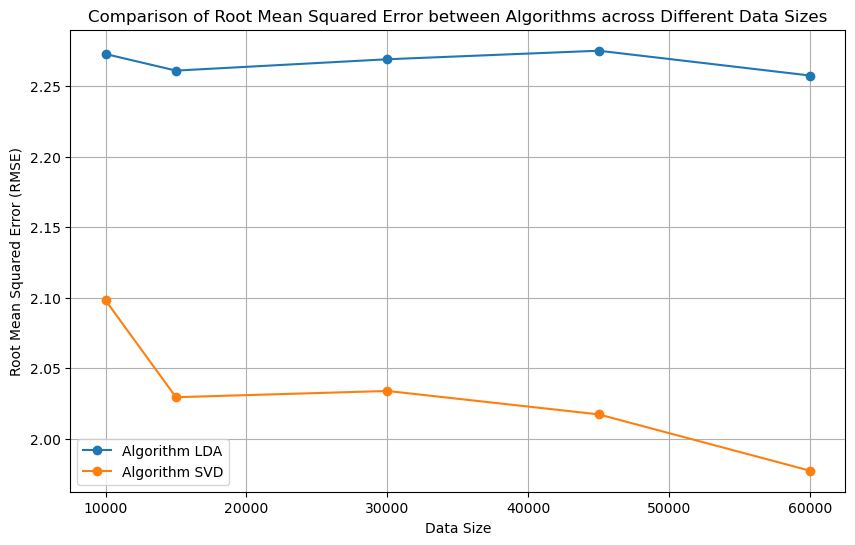

In [58]:
plt.figure(figsize=(10, 6))

plt.plot(sample_size, algo_sklearn_rmse, marker='o', label='Algorithm LDA')
plt.plot(sample_size, algo_svd_rmse, marker='o', label='Algorithm SVD')

plt.xlabel('Data Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of Root Mean Squared Error between Algorithms across Different Data Sizes')
plt.legend()
plt.grid(True)

plt.show()

In [59]:
#debug
# print(len(sample_size), len(algo_sklearn_rmse), len(algo_svd_rmse))

## Further testing with Custom SVD Algorithm

As observed in the graph above, the bigger the sample, the better the results for the SVD algorithm, so we needed to do further testing to see if the RMSE rate would drop if we feed the momdel with a bigger data sample. This way we:

- Created bigger samples;
- Set and empty list to save the results;
- Checked for the existence of result files;
- Prepped and fitted data on model;
- Saved results;
- Generated a data visualisation of SVD Performance in different data sample sizes;

In [60]:
svd_test_sample_sizes = [100000, 150000, 200000, 250000, 300000]

In [61]:
svd_test_results = []

In [62]:
# check if svd test results are available 
try: 
  with open('../results/svd_test_results.txt', 'r') as file:
    results = file.readline()
    svd_test_results = json.loads(results)
except:
  pass

svd_test_results

[0.8985723977774136,
 0.8880168249173924,
 0.8903153442603952,
 0.8944307148051304,
 0.8829755182176636]

#### Data Preparation and model fitting

Here we: 
- Set test size to 30% and training to 70%;
- checked if we had the trained model available;
- If not, we fitted the model with their train and test slices;
- Saved it onto our Models folder;

In [63]:
#run tests only if results are not available 
if len(svd_test_results) == 0:
  for n in svd_test_sample_sizes:
    sample = ratings[:n]
    X = sample[["userId","movieId"]]
    y = sample["rating"]
    X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                    random_state=104,  
                                    test_size=0.3,  
                                    shuffle=True) 
    
    # try to load pre-trained model, random state will assure that model  is trained and tested on the same data 
    filename = '../models/model_test_' + str(n) + '.sav'
    model = None
    try:
      model = pickle.load(open(filename, 'rb'))
    except:
      print("Pretrained model not found: " + 'model_test_' + str(n))
      pass
    # only train model if not available
    if model == None:
      model = SVD()
      model = model.fit(X_train,y_train)
      
    y_pred_svd = model.predict(X_test)
    mse_svd = mean_squared_error(y_test, y_pred_svd)
    svd_test_results.append(sqrt(mse_svd))
    # save model 
    pickle.dump(model, open(filename, 'wb'))

In [64]:
# save results from svd test  
with open('../results/svd_test_results.txt', 'w') as file:
    json.dump(svd_test_results, file)

#### Data Visualisation of performance in different sample sizes

Here are the results of the RMSE perfomance in different sample sizes.

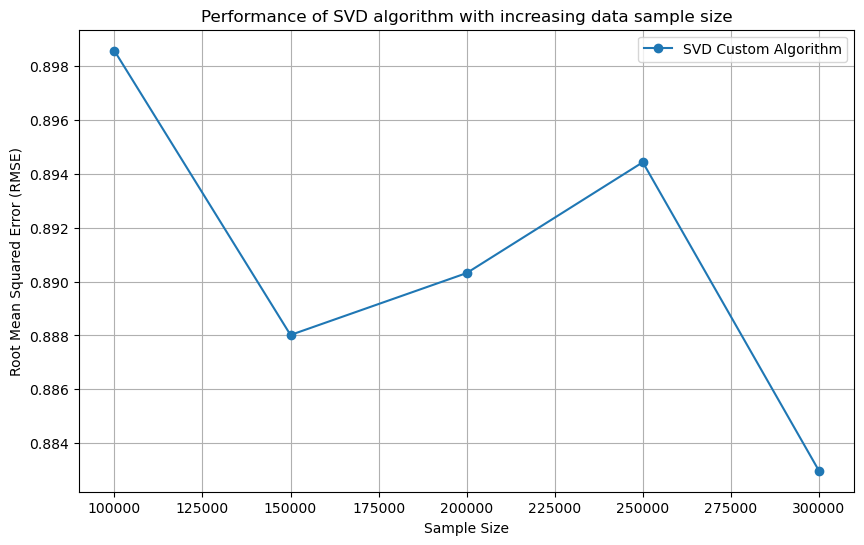

In [65]:
plt.figure(figsize=(10, 6))

plt.plot(svd_test_sample_sizes, svd_test_results, marker='o', label='SVD Custom Algorithm')

plt.xlabel('Sample Size')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Performance of SVD algorithm with increasing data sample size')
plt.legend()
plt.grid(True)

plt.show()

--------------------

# Training Final Model

With this algorithm the more Movie and User data we provide, e.g. rating score, the better it will perform. This happens because it adjusts biases from user and movie and let us filter the dataframe for movies that were rated more than 10000 times. This will help with time required to train the model and will assure that model has enough data to perform well.

## Data Preparation

This is the last data understanding and preparation we will have before the data preparation for modelling and it consisted of:
- Filtering movies rated more than 10k times: This step will allow us to prep the data do provide better predictions;
- Create another dataset: this filtered dataset is called 'ratings_final' and has 588 movies in it.

In [66]:
#filter for movies that were rated more than 10k times 
movie_ratings_count = ratings['movieId'].value_counts().reset_index()
ids_10k = movie_ratings_count[movie_ratings_count["count"] > 10000]
ids_10k.info()
ids = ids_10k["movieId"].values

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movieId  588 non-null    int64
 1   count    588 non-null    int64
dtypes: int64(2)
memory usage: 13.8 KB


In [67]:
# filter original dataframe for rows that contain selected movieIds 
ratings_final = ratings[ratings['movieId'].isin(ids)]

After filtering we have 588 movies in our final dataset.

In [68]:
ratings_final["movieId"].nunique()

588

In [69]:
movies = None
ratings = None

We have reduced size of the dataframe by half.

In [70]:
ratings_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11877943 entries, 0 to 25000093
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 362.5 MB


In [71]:
filename = "../Datasets/ratings_final.csv"
pd.DataFrame(data=ratings_final).to_csv(filename, sep=',', index=False, encoding='utf-8')

## Data Preparation for Final Modeling

This is the last data preparation done in this project and it does:
- X and Y variables are established: here we chose which columns are part of the independent values and which is the dependent one for the dataset 'ratings_final'.
- Slices Train and Test: We set it to defaul values: 75% for training and 25% for testing.

In [72]:
ratings_final = pd.read_csv("../Datasets/ratings_final.csv")

In [73]:
X = ratings_final[["userId", "movieId"]]
y = ratings_final["rating"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [75]:
X = None
y = None

Checking if trained model exists:

In [76]:
filename = '../models/final_model.sav'
final_model = None
try:
  final_model = pickle.load(open(filename, 'rb'))
except:
  print("Final model not found")

# Evaluation

In the evaluation phase we will see if the final model does what we were expecting and if our objectives were accomplished. As an overall: We were happy with the results we obtained in modelling, and started to think of alternatives to upgrade the results in deployment. Things that we looked out when in evaluation:

- Model performance against sklearn algorithms: Our model performed better;
- Model Performance in a bigger sample of the data: It performed ever better once using a bigger sample of the data;
- We checked for over or underfitting: Both test and trained slices had similar results, meaning it was neither under or overfitting;

After deployment more evaluation was made to adjust biases with movies that contained more ratings than others, as well as genre biases as well. We noticed that we would need to adjust the system to take in consideration the user's taste in certain genres as well as the similarity with similar users.  

## Training and Validating Final Model

In here test and training sets had their RMSE scores below 0.90, in very similar scores, which indicates two things:

- The model improved in bigger samples of the data, coming from under 2.0 RSME to 0.89 RSME;
- Both tested and trained slices have similar results, meaning proper tuning was made and the model is not under or overfitting;

In [77]:
filename = '../models/final_model.sav'
if final_model is None:
  final_model = SVD(n_factors=1, n_epochs=1)
  final_model.fit(X_train, y_train)
# after trained, save final model 
pickle.dump(final_model, open(filename, 'wb'))

In [78]:
y_pred_final = None
y_train_predict_final = None

Test prediction against testing set

In [79]:
# import X_test prediction results if available 
try: 
  with open('../results/final_results_test.txt', 'r') as file:
    results = file.readline()
    y_pred_final = json.loads(results)
except:
  print("Results not found")
  pass

In [80]:
if y_pred_final == None:
  y_pred_final = final_model.predict(X_test)

In [81]:
with open('../results/final_results_test.txt', 'w') as file:
    json.dump(y_pred_final, file)

Test against training set

In [82]:
# import X_train prediction results if available
try: 
  with open('../results/final_results_train.txt', 'r') as file:
    results = file.readline()
    y_train_predict_final = json.loads(results)
except:
  print("Results not found")
  pass

In [83]:
if y_train_predict_final == None:
  y_train_predict_final = final_model.predict(X_train)

In [84]:
with open('../results/final_results_train.txt', 'w') as file:
    json.dump(y_train_predict_final, file)

In [85]:
mrse_final = sqrt(mean_squared_error(y_test, y_pred_final))
print("Final MRSE for the model is: {n}".format(n = str(mrse_final)))

Final MRSE for the model is: 0.8958125178306325


In [86]:
mrse_final_train = sqrt(mean_squared_error(y_train, y_train_predict_final))
print("Final MRSE for training data the model is: {n}".format(n = str(mrse_final_train)))

Final MRSE for training data the model is: 0.8915352604641722


# Deployment

### Estimated rating dataframe preprocessing 

In this step we generated a dataset named 'final_estimated_rating' and renamed it as 'df_estimated' that contains 588 unique movies, 162.109 unique users and 95MI estimated predictions. This works in a way to pre process and generate rating predictions in advance, so when we need to generate a prediction, we have it all trained and done. 

In [87]:
userId = []
movieId = []
rating = []

In [88]:
unique_user_id = ratings_final["userId"].unique()
unique_movie_id = ratings_final["movieId"].unique()

In [89]:
df_estimated = None
try: 
  df_estimated = pd.read_csv("../datasets/final-estimated-rating.csv")
except:
  pass

In [90]:
if df_estimated is None: 
  for u_id in unique_user_id:
    for m_id in unique_movie_id:
      userId.append(u_id)
      movieId.append(m_id)
      rating.append(final_model.estimate(u_id, m_id))

In [91]:
if df_estimated is None: 
  data = {
    "userId": userId,
    "movieId": movieId,
    "rating" : rating
  }
  filename = "../datasets/final-estimated-rating.csv"
  df_estimated = pd.DataFrame(data=data)
  df_estimated.to_csv(filename, sep=',', index=False, encoding='utf-8')

In [92]:
df_estimated["movieId"].nunique()

588

In [93]:
df_estimated["userId"].nunique()

162109

In [94]:
df_estimated.shape

(95320092, 3)

## Cosine Similarity

This Cosine Similarity function works in a way that it finds users that rated the movies similarly to the way you rated movies on our GUI. This allows us to access the ratings these users gave to others titles on our catalogue and give movies recommendations back at our user using an estimative.

In [95]:
def find_similar_users(target_user_df, rating_df):
  user_rated = target_user_df["movieId"].values
  ratings = rating_df[rating_df["movieId"].isin(user_rated)]
  similar_users = []
  counter = 1
  while len(similar_users) < 5 and counter < 6:
    print("Fold: ", counter)
    s = ratings.sample(50000)
    df_merged = pd.concat([target_user_df,s])
    pivot_df = df_merged.pivot_table(index='userId', columns='movieId', values='rating', aggfunc='mean').fillna(0)
    similarity_matrix = cosine_similarity(pivot_df)
    similarity_matrix_df = pd.DataFrame(similarity_matrix, index=pivot_df.index, columns=pivot_df.index)
    select_user_id = target_user_df["userId"].min()
    n = 10 
      
    #set a threshold for similarity
    user_similarity_threshold =  0.65
      
    similar_users = similarity_matrix_df[similarity_matrix_df[select_user_id]>user_similarity_threshold][select_user_id].sort_values(ascending=False)[:n]
    counter += 1
  return similar_users 

## Create a Random User as Proof of Concept

Here we are doing a simulation with a hypothetical user that rated a random selection of movies in a random selection of ratings and identify this user as user 0. Then we use our function 'find_similar_users' (Cosine Similarity) based on our 'ratings_final' dataset and find a group of 10 users with similar ratings (user 0 + 9 users). We then calculate the average rating and merge with the movie dataset generating 'merged_final' that when sorted becomes 'sorted_df'.

'Sorted_df' contains movies sorted in a descending way from highest to smallest estimated ratings for our user 0, meaning those are the estimated ratings that our user 0 would probably give to those 578 movies based on this user similarity with other users that rated 0.8 for more or less equally to that estimated rating.

In [96]:
movies_ingrid = [2571,1,1206,1387,912,920]

In [97]:
ratings_ingrid = [5,5,2,1.5,0.5,4.5]

In [98]:
# select 10 random movie ids to rate
r = np.random.default_rng()
ids = ratings_final["movieId"].values
m_ids = []
ratings = []
for i in range(1,11):
  m_ids.append(ids[r.integers(0,(len(ids) -1 ))])
  ratings.append(r.integers(1,11) / 2)

print(m_ids)
print(ratings)

[1090, 68157, 3081, 4816, 19, 2194, 63082, 5459, 316, 72998]
[4.0, 4.0, 4.5, 2.0, 1.0, 4.5, 3.5, 2.0, 1.5, 4.0]


In [99]:
# set target user id to 0 and create user dataframe
user_id = 0
dict = {
  "userId" : [user_id,user_id,user_id,user_id,user_id,user_id,user_id,user_id,user_id,user_id],
  "movieId" : m_ids,
  "rating" : ratings
} 
df_user_0 = pd.DataFrame(dict)
df_user_0

,userId,movieId,rating
0,0,1090,4.0
1,0,68157,4.0
2,0,3081,4.5
3,0,4816,2.0
4,0,19,1.0
5,0,2194,4.5
6,0,63082,3.5
7,0,5459,2.0
8,0,316,1.5
9,0,72998,4.0


In [100]:
users = find_similar_users(df_user_0,ratings_final )
print(users)

Fold:  1
userId
0         1.000000
42855     0.882785
5026      0.862525
64612     0.846589
2932      0.838628
102121    0.834000
148091    0.803166
50319     0.800402
120690    0.792606
126530    0.791281
Name: 0, dtype: float64


In [101]:
ids = [] 
for id, score in users.items():
  if id == 0: 
    continue
  ids.append(id)
  print(id, score)

42855 0.8827852245859424
5026 0.8625249170810061
64612 0.8465893237846006
2932 0.8386278693775346
102121 0.8339998000003586
148091 0.8031663070185886
50319 0.8004021014509601
120690 0.792605561970956
126530 0.7912810982182725


In [102]:
filtered_df = df_estimated[df_estimated['userId'].isin(ids) & ~df_estimated['movieId'].isin(df_user_0['movieId'])]

# Group by 'movieId' and calculate average rating
average_rating = filtered_df.groupby('movieId')['rating'].mean().reset_index()

average_rating.columns = ['movieId', 'Estimated Rating']

print(average_rating)

     movieId  Estimated Rating
0          1          3.877721
1          2          3.302499
2          3          3.180581
3          5          3.137568
4          6          3.881161
..       ...               ...
573   122886          3.563823
574   122904          3.697291
575   134130          4.027542
576   134853          3.898880
577   164179          3.966347

[578 rows x 2 columns]


In [103]:
path_movies ='../Datasets/movies.csv'
movies = pd.read_csv(path_movies)

Below we developed a way to deal with genre and rating bias, by also taking in consideration what the user rates when using our GUI. This optmises the recommendation system and makes the user receive movies that are more towards their liking than just movies that are well rated in the system.  

In [104]:
# account for user bias 
user_0_movies = movies[movies["movieId"].isin(df_user_0["movieId"].values)]
# create a dataframe to extract genres from moves that user has rated 
user_0_movies = pd.merge(user_0_movies, df_user_0, on="movieId", how="left")



In [105]:
# extract genres 
biases = {}

for i in range(len(user_0_movies)):
  # extract columns from df 
  rating = user_0_movies.iloc[i, 4]
  genres = user_0_movies.iloc[i, 2].split("|")
  # update factor 
  factor = 0
  if rating < 2:
    factor = -0.1
  if rating > 3.5 :
    factor = 0.1
  # update biases 
  for genre in genres:
    if genre not in biases:
      biases[genre] = factor
    else :  
      biases[genre] += factor
      
for k, v in biases.items():
    biases[k] = v + 1
    
biases

{'Comedy': 0.9,
 'Action': 1.2,
 'Adventure': 1.0,
 'Sci-Fi': 1.0,
 'Drama': 1.3,
 'War': 1.2,
 'Crime': 1.1,
 'Fantasy': 1.1,
 'Horror': 1.1,
 'Mystery': 1.1,
 'Romance': 1.1,
 'IMAX': 1.1}

In [106]:
merged_final = pd.merge(average_rating, movies, on='movieId', how='left')

Apply genre bias for the final recommendation

In [107]:
def alter_ratings(row):
    rating = row['Estimated Rating']
    genres = row['genres'].split("|")
    # apply biases 
    for genre in genres:
      if genre in biases:
        rating *= biases[genre]
    row['Estimated Rating'] = rating 
    return row

In [108]:
merged_final = merged_final.apply(alter_ratings, axis=1)

In [109]:
# rescale scores to 0.5-5 
scaler = MinMaxScaler(feature_range=(0.5, 5))
scaled_values = scaler.fit_transform(merged_final[['Estimated Rating']])
merged_final['Estimated Rating'] = scaled_values

In [110]:
merged_final.head()

,movieId,Estimated Rating,title,genres
0,1,1.572204,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,1.420126,Jumanji (1995),Adventure|Children|Fantasy
2,3,1.063174,Grumpier Old Men (1995),Comedy|Romance
3,5,0.823499,Father of the Bride Part II (1995),Comedy
4,6,2.519350,Heat (1995),Action|Crime|Thriller


In [111]:
sorted_df = merged_final.sort_values(by='Estimated Rating', ascending=False)
sorted_df.head(30)

,movieId,Estimated Rating,title,genres
544,79132,5.000000,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
551,88125,4.583867,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
508,49530,4.525225,Blood Diamond (2006),Action|Adventure|Crime|Drama|Thriller|War
196,1233,4.374354,"Boot, Das (Boat, The) (1981)",Action|Drama|War
184,1208,4.372006,Apocalypse Now (1979),Action|Drama|War
206,1262,4.365802,"Great Escape, The (1963)",Action|Adventure|Drama|War
522,58559,4.353758,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
292,2028,4.326108,Saving Private Ryan (1998),Action|Drama|War
25,110,4.312314,Braveheart (1995),Action|Drama|War
31,151,4.147589,Rob Roy (1995),Action|Drama|Romance|War


In [112]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, 544 to 85
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieId           578 non-null    int64  
 1   Estimated Rating  578 non-null    float64
 2   title             578 non-null    object 
 3   genres            578 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 22.6+ KB


In [113]:
sorted_df.shape

(578, 4)

## Recommender class

This class allows us to use our recommendation system on our GUI. Its functions do:

- create_user - Creates the user 0.
- generate_recommendations - this identifies users that gave similar ratings to our user 0.
- extract_genre_bias - This removes biases in genres.
- alter_ratings - 

In [114]:
class Recommender:
  def _init_(self, movies, df_estimated, ratings_final):
    self.movies = movies
    self.df_estimated = df_estimated
    self.ratings_final = ratings_final
    self.find_similar_users = find_similar_users
  def create_user(self, data):
    self.df_user_0 = pd.DataFrame(data)
    return self.df_user_0
  
  def generate_recommendation(self, user_gui):
    print("Finding similar users")
    users = find_similar_users(user_gui,ratings_final )
    print("Finding similar users")
    
    ids = [] 
    for id, score in users.items():
      if id == 0: 
        continue
      ids.append(id)
    filtered_df = self.df_estimated[self.df_estimated['userId'].isin(ids) & ~self.df_estimated['movieId'].isin(user_gui['movieId'])]

    # Group by 'movieId' and calculate average rating
    average_rating = filtered_df.groupby('movieId')['rating'].mean().reset_index()

    average_rating.columns = ['movieId', 'Estimated Rating']

    average_rating
    merged_final = pd.merge(average_rating, self.movies, on='movieId', how='left')
    
    #get genre biases
    self.biases = self.extract_genre_biases(self.df_user_0, self.movies) 
  
    
    merged_final = merged_final.apply(self.alter_ratings, axis = 1)
    
    # scale scores to 0.5 - 5
    scaler = MinMaxScaler(feature_range=(0.5, 5))
    scaled_values = scaler.fit_transform(merged_final[['Estimated Rating']])
    merged_final['Estimated Rating'] = scaled_values

    
    sorted_df = merged_final.sort_values(by='Estimated Rating', ascending=False)
    return sorted_df
  
  def extract_genre_biases(self, df_user_0, movies):
    # account for user bias 
    user_0_movies = movies[movies["movieId"].isin(df_user_0["movieId"].values)]
    # create a dataframe to extract genres from movies that user has rated 
    user_0_movies = pd.merge(user_0_movies, df_user_0, on="movieId", how="left")
    # extract genres 
    biases = {}

    for i in range(len(user_0_movies)):
      # extract columns from df 
      rating = user_0_movies.iloc[i, 4]
      genres = user_0_movies.iloc[i, 2].split("|")
      # update factor 
      factor = 0
      if rating < 2:
        factor = -0.1
      if rating > 3.5 :
        factor = 0.1
      # update biases 
      for genre in genres:
        if genre not in biases:
          biases[genre] = factor
          # biases.update({genre: factor})
        else :  
          biases[genre] += factor
    # update factor 
    for k, v in biases.items():
        biases[k] = v + 1
        
    return biases
  
  def alter_ratings(self, row):
    # print(row)
    rating = row['Estimated Rating']
    genres = row['genres'].split("|")
    # apply biases 
    for genre in genres:
      if genre in self.biases:
        rating *= self.biases[genre]
    row['Estimated Rating'] = rating 
    return row

In [115]:
ids = ratings_final["movieId"].values
titles_df = movies[movies["movieId"].isin(ids)][["movieId","title"]]

In [116]:
titles_df.reset_index(inplace=True)
       # self.recommender = Recommender(movies, df_estimated, ratings_final)
titles_df.sort_values("title", inplace=True, ascending=True)

# GUI

This Graphical User Interface implements the Recommender Class and gives the user the possibility of trying our system themselves. As an user you can give rating to some titles and that will enable the system to find users that rated those movies in a similar way, and recommend to you the movies those users would judge as 'highly rated productions'. 

This is a simple prdone and how the prototype, just to show how the use of the system can be done by a user. It is recommended that 10 ratings are given as a way to tune our system, but less or more can also be done if desired be. 

In [117]:
class MovieGUI:
    def __init__(self, dataset):
        self.recommender = Recommender(movies, df_estimated, ratings_final)
        self.dataset = dataset
        self.root = tk.Tk()
        self.root.title("Movie Recommender")
        self.root.geometry("900x600")
        self.root.configure(bg="lightblue")
        self.title_label = tk.Label(self.root, text="Movie Recommendation System", font=("Helvetica", 20), bg="lightblue")
        self.title_label.pack()
        self.subtitle_label = tk.Label(self.root, text="Give a rating between 1-10 to 10 movies to obtain your recommendation:", font=("Helvetica", 12), bg="lightblue")
        self.subtitle_label.pack()
        self.main_frame = tk.Frame(self.root, bg="white", borderwidth=2, relief="solid")
        self.main_frame.pack(padx=20, pady=20, fill=tk.BOTH, expand=True)
        self.main_frame.grid_propagate(False)
        self.main_frame.config(width=800)
        self.rating_pickers = []  # List to hold rating pickers
        self.ratings = {"userId": [], "movieId": [], "rating": []}  # Dictionary to store ratings
        self.canvas = tk.Canvas(self.main_frame, bg="white", width=800, height=400)
        self.canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
        self.scrollbar = ttk.Scrollbar(self.main_frame, orient=tk.VERTICAL, command=self.canvas.yview)
        self.scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        self.canvas.configure(yscrollcommand=self.scrollbar.set)
        self.canvas.bind("<Configure>", lambda e: self.canvas.configure(scrollregion=self.canvas.bbox("all")))
        self.inner_frame = tk.Frame(self.canvas, bg="white")
        self.canvas.create_window((0, 0), window=self.inner_frame, anchor="nw")
        for i, row in enumerate(self.dataset.itertuples(), start=1):
            title_label = tk.Label(self.inner_frame, text=row.title, bg="white")
            title_label.grid(row=i, column=0, padx=(0, 10), pady=5, sticky="ns")
            rating_picker = ttk.Combobox(self.inner_frame, values=[""] + [i for i in range(1, 11)], width=3)
            rating_picker.grid(row=i, column=1, pady=5, sticky="ns")
            self.rating_pickers.append(rating_picker)
        self.recommend_button = tk.Button(self.root, text="Recommend", font=("Helvetica", 14), command=self.recommend_movie)
        self.recommend_button.pack(pady=10)
        self.subtitle_label = tk.Label(self.root, text="by Ingrid & Robert", font=("Helvetica", 10), bg="lightblue")
        self.subtitle_label.pack(pady=5)

    def recommend_movie(self):
        for i, rating_picker in enumerate(self.rating_pickers):
            rating = rating_picker.get()
            if rating:
                self.ratings["userId"].append("0")  # Add placeholder for userId
                self.ratings["movieId"].append(self.dataset.iloc[i].movieId)
                self.ratings["rating"].append(float(rating)/2)
        user = self.recommender.create_user(self.ratings)
        print("User : ", user)
        self.recommendation_df = self.recommender.generate_recommendation(user)

        self.display_recommendation(self.recommendation_df)
        
    def display_recommendation(self, recommendation_df):
        # Clear existing content in the inner_frame
        for widget in self.inner_frame.winfo_children():
            widget.destroy()

        # Display loading message
        loading_label = tk.Label(self.inner_frame, text="Loading recommendations...", bg="white")
        loading_label.grid(row=0, columnspan=2, pady=10)    

        # Remove loading message
        loading_label.grid_forget()    

        # Display recommendation dataframe in main_frame
        recommendation_text = tk.Text(self.inner_frame, wrap="word", width=120, height=80, bg="white", font=("Helvetica", 12))
        recommendation_text.insert(tk.END, "Recommended Movies:\n\n")
        for i, movie_id, rating, title, genres in recommendation_df.itertuples():
            recommendation_text.insert(tk.END, f"\tTitle: {title} \t Estimated Rating: {round(rating,1)} \t Genres:{genres}\n\n")
        recommendation_text.grid(row=1, columnspan=2, pady=5, sticky="nsew")


        recommendation_text.tag_configure("center", justify="center")
        # Update scroll region
        self.canvas.update_idletasks()  # Update widgets to get accurate scroll region
        self.canvas.configure(scrollregion=self.canvas.bbox("all"))

    def run(self):
        self.root.mainloop()

# Load the dataset

# Create GUI instance with dataset
gui = MovieGUI(titles_df)
gui.run()

TypeError: Recommender() takes no arguments

--------------

----------

References and appendex are available on report.